Google Play Store Analysis

Objective:

To do trend analysis for boosting the visibility of certain apps with respect their new features.

Problem Statement:

Google Play Store team is about to launch a new feature wherein, certain apps that are promising, are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility. This feature will help bring more attention to newer apps that have the potential.

In [1]:
# Importing Libraries

import numpy as npy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn import preprocessing

import statsmodels.api as sm 

In [2]:
# Importing Data sets
playstore_df = pd.read_csv('googleplaystore.csv')

Fields in the data –

App: Application name

Category: Category to which the app belongs

Rating: Overall user rating of the app

Reviews: Number of user reviews for the app

Size: Size of the app

Installs: Number of user downloads/installs for the app

Type: Paid or Free

Price: Price of the app

Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult

Genres: An app can belong to multiple genres (apart from its main category). For example, a musical family game will belong to Music, Game, Family genres.

Last Updated: Date when the app was last updated on Play Store

Current Ver: Current version of the app available on Play Store

Android Ver: Minimum required Android version

In [3]:
playstore_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


In [4]:
#Checking whether the attributes contains Null values

playstore_df.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [5]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
#Creating New Dataframe
new_playstore_df = playstore_df.dropna()

In [7]:
new_playstore_df.isnull().any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver       False
Android Ver       False
dtype: bool

In [8]:
new_playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [9]:
new_playstore_df.describe()

,Rating
count,9360.000000
mean,4.191838
std,0.515263
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [10]:
type(new_playstore_df)

pandas.core.frame.DataFrame

In [11]:
#analyse the attribute 'size'
playstore_df.Size.head(20)

0      19M
1      14M
2     8.7M
3      25M
4     2.8M
5     5.6M
6      19M
7      29M
8      33M
9     3.1M
10     28M
11     12M
12     20M
13     21M
14     37M
15    2.7M
16    5.5M
17     17M
18     39M
19     31M
Name: Size, dtype: object

In [12]:
#converting the "M" and "K" into "e6" and "e3" 

new_playstore_df['Size'] = new_playstore_df.Size.str.replace('M','e6')
new_playstore_df['Size'] = new_playstore_df.Size.str.replace('K','e3')

In [13]:
new_playstore_df.Size

0                      19e6
1                      14e6
2                     8.7e6
3                      25e6
4                     2.8e6
                ...        
10834                 2.6e6
10836                  53e6
10837                 3.6e6
10839    Varies with device
10840                  19e6
Name: Size, Length: 9360, dtype: object

In [14]:
#Converting the Coloun "Size" into Numeric
new_playstore_df['Size'] = pd.to_numeric(new_playstore_df['Size'], errors = 'coerce')

In [15]:
new_playstore_df.Size.isna()

0        False
1        False
2        False
3        False
4        False
         ...  
10834    False
10836    False
10837    False
10839     True
10840    False
Name: Size, Length: 9360, dtype: bool

In [16]:
#To convert every lines into numeric need to fill "NA" by Mean
new_playstore_df['Size'] = new_playstore_df['Size'].fillna(new_playstore_df['Size'].mean())

In [17]:
new_playstore_df.Size.isna()

0        False
1        False
2        False
3        False
4        False
         ...  
10834    False
10836    False
10837    False
10839    False
10840    False
Name: Size, Length: 9360, dtype: bool

In [18]:
new_playstore_df.Size.value_counts()

2.374632e+07    1894
1.400000e+07     165
1.200000e+07     161
1.500000e+07     159
1.100000e+07     159
                ... 
6.500000e+07       9
8.900000e+07       9
8.600000e+07       8
9.000000e+07       5
1.000000e+06       4
Name: Size, Length: 182, dtype: int64

In [19]:
#analysing the attribute 'installs'
new_playstore_df.Installs.value_counts()

1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [20]:
# Removing ‘+’, ‘,’ from the field, convert it to integer

new_playstore_df['Installs'] = new_playstore_df.Installs.str.replace('+', '')
new_playstore_df['Installs'] = new_playstore_df.Installs.str.replace(',', '')

In [21]:
new_playstore_df.Installs.isna()

0        False
1        False
2        False
3        False
4        False
         ...  
10834    False
10836    False
10837    False
10839    False
10840    False
Name: Installs, Length: 9360, dtype: bool

In [22]:
#converting the install values into numeric
new_playstore_df['Installs'] = pd.to_numeric(new_playstore_df['Installs'])

In [23]:
new_playstore_df.Installs.value_counts()

1000000       1576
10000000      1252
100000        1150
10000         1009
5000000        752
1000           712
500000         537
50000          466
5000           431
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

In [24]:
#analysing the attribue 'price'
new_playstore_df.Price.value_counts()

0        8715
$2.99     114
$0.99     106
$4.99      70
$1.99      59
         ... 
$2.56       1
$1.50       1
$4.84       1
$1.59       1
$3.08       1
Name: Price, Length: 73, dtype: int64

In [25]:
#Price field is a string and has $ symbol, Hence replaced with ''
new_playstore_df['Price'] = new_playstore_df.Price.str.replace('$', '')

In [26]:
new_playstore_df.Price.value_counts()

0         8715
2.99       114
0.99       106
4.99        70
1.99        59
          ... 
2.50         1
4.60         1
1.20         1
3.02         1
299.99       1
Name: Price, Length: 73, dtype: int64

In [27]:
#Convert it to numeric
new_playstore_df['Price'] = pd.to_numeric(new_playstore_df['Price'])

In [28]:
new_playstore_df.Price

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Price, Length: 9360, dtype: float64

In [29]:
new_playstore_df.Reviews

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 9360, dtype: object

In [30]:
#Converting "Reviews" into numeric
new_playstore_df['Reviews'] = pd.to_numeric(new_playstore_df['Reviews'])

In [31]:
new_playstore_df.Reviews

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 9360, dtype: int64

In [32]:
#Sanitary Checks
playstore_df.Rating

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    NaN
10839    4.5
10840    4.5
Name: Rating, Length: 10841, dtype: float64

In [33]:
# delete all rows with Ratings outside the 1-5 range
indexOut = new_playstore_df[ (new_playstore_df['Rating'] < 0) & (new_playstore_df['Rating'] > 5) ].index
new_playstore_df.drop(indexOut , inplace=True)

In [34]:
new_playstore_df.Rating

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 9360, dtype: float64

In [35]:
# delete Review rows that exceed Installs
new_playstore_df = new_playstore_df[new_playstore_df['Reviews'] <= new_playstore_df['Installs']]

In [36]:
new_playstore_df.Rating

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 9353, dtype: float64

In [37]:
# Need make free apps (type = “Free”), the price should not be >0. Drop any such rows. 
indexOut2 = new_playstore_df[(new_playstore_df['Price'] >= 0) & (new_playstore_df['Type'] == 'Free')].index 
# drop these row 
new_playstore_df.drop(indexOut2, inplace = True) 

In [38]:
new_playstore_df.shape

(642, 13)

<AxesSubplot:ylabel='Price'>

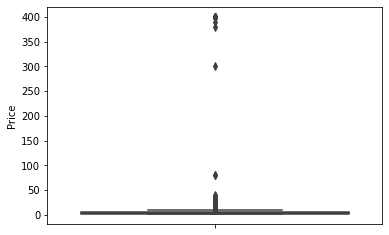

In [39]:
#Performing Univeriant Analysis
#Boxplot for Price
sns.boxplot(y=new_playstore_df["Price"])

<AxesSubplot:ylabel='Reviews'>

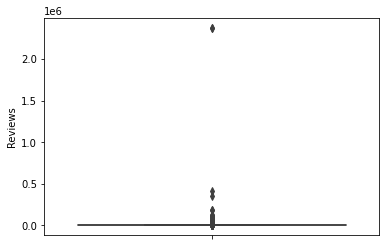

In [40]:
#Boxplot for Reviews
sns.boxplot(y=new_playstore_df["Reviews"])

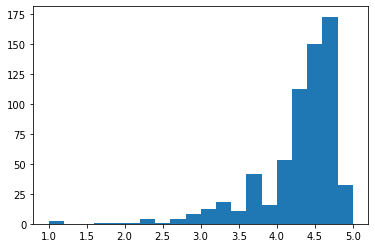

In [41]:
#Histogram for Ratings
plt.hist(new_playstore_df.Rating, bins=20)
plt.show()

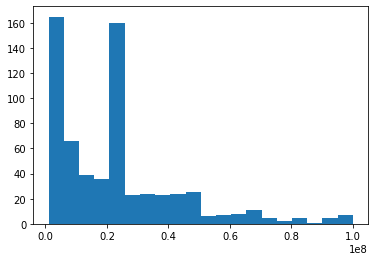

In [42]:
#Histogram for Size
plt.hist(new_playstore_df.Size, bins=20)
plt.show()

#Outlier Treatment

1- Price
Those apps over $200 seems to be outliers.
2- Reviews
Drop records having more than 2 million reviews.
3- Installs
Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

In [43]:
#drop Price rows at 200 and higher
new_playstore_df_1=new_playstore_df[new_playstore_df['Price'] < 200]
#verify
new_playstore_df_1.shape

(627, 13)

In [44]:
#Drop Review rows with over 2 million reviews

new_playstore_df_1=new_playstore_df_1[new_playstore_df_1['Reviews'] <= 2000000]

#verify

new_playstore_df_1.shape

(625, 13)

In [45]:
#Percentile

percentiles=new_playstore_df_1[['Rating','Size','Installs','Price']]

In [46]:
#10, 25, 50, 70, 90, 95, 99 percentiles

print("10th percentile : ",
       npy.percentile(percentiles, 10))

print("25th percentile : ",
       npy.percentile(percentiles, 25))

print("50th percentile : ", 
       npy.percentile(percentiles, 50))

print("70th percentile : ",
       npy.percentile(percentiles, 70))

print("90th percentile : ",
       npy.percentile(percentiles, 90))

print("95th percentile : ",
       npy.percentile(percentiles, 95))

print("99th percentile  : ",
       npy.percentile(percentiles, 99))

10th percentile :  2.9
25th percentile :  4.2
50th percentile :  19.99
70th percentile :  100000.0
90th percentile :  23746316.635413878
95th percentile :  36049999.999999724
99th percentile  :  70019999.99999952


<AxesSubplot:>

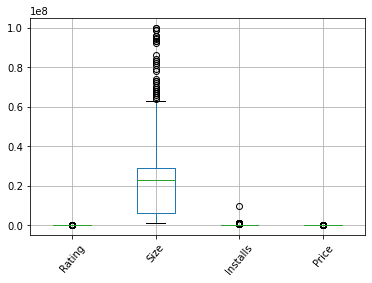

In [47]:
#find other outliers with boxplots 
percentiles.boxplot(rot=50)

<AxesSubplot:>

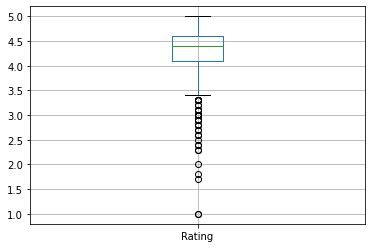

In [48]:
percentiles.boxplot(column=['Rating'])

In [49]:
#remove outliers
indexOut3 = new_playstore_df_1[(new_playstore_df_1['Rating'] < 3.5) ].index
new_playstore_df_1.drop(indexOut3 , inplace=True)

In [50]:
new_playstore_df_1.shape

(574, 13)

<AxesSubplot:>

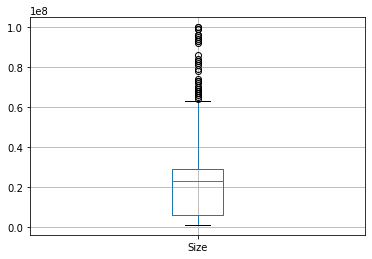

In [51]:
percentiles.boxplot(column=['Size'])

<AxesSubplot:>

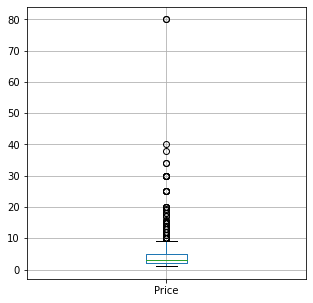

In [52]:
percentiles.boxplot(column=['Price'], figsize=(5,5))

In [53]:
#remove outliers

indexOut4 = new_playstore_df_1[(new_playstore_df_1['Price'] > 40)].index
new_playstore_df_1.drop(indexOut4 , inplace=True)

#verify
new_playstore_df_1.shape

(572, 13)

<AxesSubplot:>

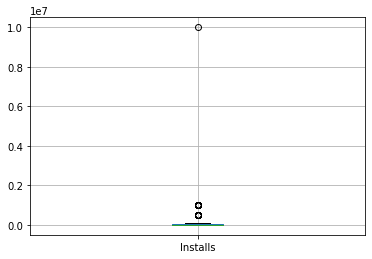

In [54]:
percentiles.boxplot(column=['Installs'])

In [55]:
#remove outliers

indexOut5 = new_playstore_df_1[(new_playstore_df_1['Installs'] >= 100000000)].index
new_playstore_df_1.drop(indexOut5 , inplace=True)

#verify
new_playstore_df_1.shape

(572, 13)

<AxesSubplot:xlabel='Rating', ylabel='Price'>

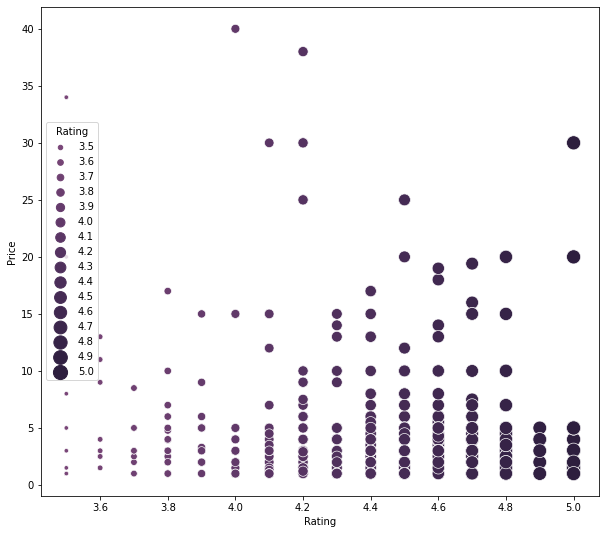

In [56]:
#Scatter plot for Rating vs. Price
plt.figure(figsize=(10, 9))
sns.scatterplot(
    data=new_playstore_df_1, x="Rating", y="Price", hue="Rating", size="Rating",
    sizes=(20, 200), hue_norm=(0, 5), legend="full")

<AxesSubplot:xlabel='Rating', ylabel='Size'>

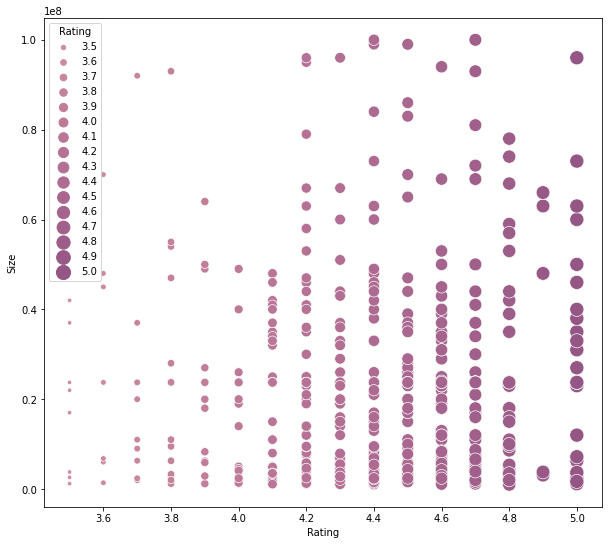

In [57]:
#Scatter plot for Rating vs. Size
plt.figure(figsize=(10, 9))
sns.scatterplot(
    data=new_playstore_df_1, x="Rating", y="Size", hue="Rating", size="Rating",
    sizes=(20, 200), hue_norm=(2, 7), legend="full")

<AxesSubplot:xlabel='Rating', ylabel='Reviews'>

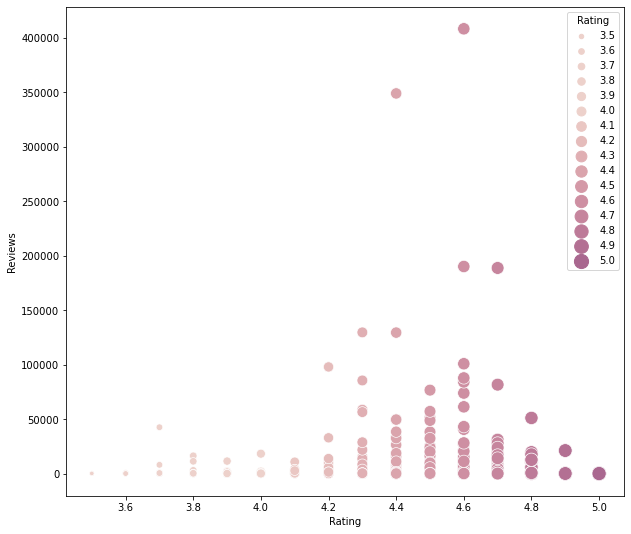

In [58]:
#Scatter plot for Rating vs. Price

plt.figure(figsize=(10, 9))
sns.scatterplot(
    data=new_playstore_df_1, x="Rating", y="Reviews", hue="Rating", size="Rating",
    sizes=(20, 200), hue_norm=(4, 6), legend="full")

[None, None, None, None, None, None, None, None]

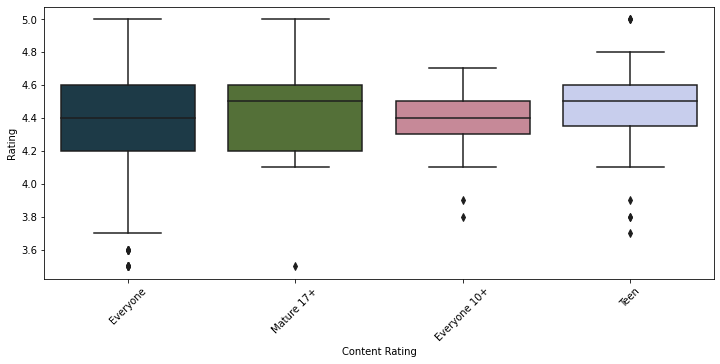

In [59]:
#Boxplot for Rating vs. Content Rating
plt.figure(figsize=(12, 5))
r=sns.boxplot(x ='Content Rating', y ='Rating', data = new_playstore_df_1, palette ='cubehelix') 
plt.setp(r.get_xticklabels(), rotation=45)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

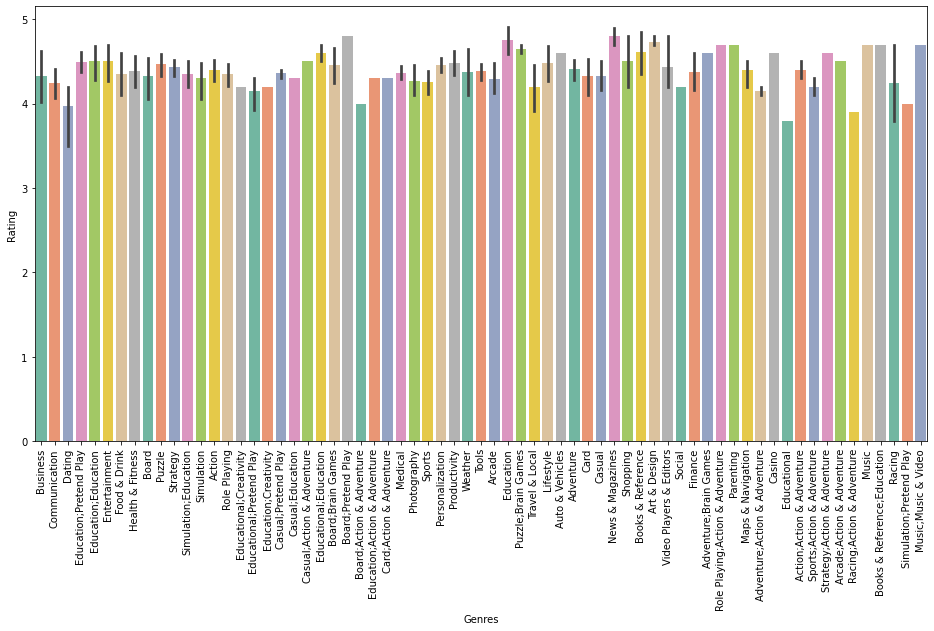

In [60]:
# Plot categorical data in relation to Genres

plt.figure(figsize=(16, 8))
g=sns.barplot(x ='Genres', y ='Rating', data = new_playstore_df_1, palette ='Set2') 
plt.setp(g.get_xticklabels(), rotation=90)

Observations:
1.App, Last Updated, Current Ver, and Genres have too many unique entries to plot.
2.Between Price and Rating:
-Most data concentrates within Ratings 4.4 to 5.0 and Price between 0 and 10.
-Price does not mean better ratings.
3.Rating and Size:
-Entries seem evenly distributed throughout sizes.
-Heavier ones rate around 4.4 to 4.8.
-Lighter ones rate better than heavier ones.
4.Rating and Reviews:
-Amount of reviews do not always mean better ratings.
5.Rating and Content Rating:
-There does not seem to be a difference between Content Ratings in relation to Ratings.
6.Genres and Rating:
-Board Pretend Play rate highest.